<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#logistic-regression" data-toc-modified-id="logistic-regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>logistic regression</a></span><ul class="toc-item"><li><span><a href="#data" data-toc-modified-id="data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>data</a></span></li><li><span><a href="#model" data-toc-modified-id="model-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>model</a></span></li><li><span><a href="#predict" data-toc-modified-id="predict-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>predict</a></span></li><li><span><a href="#contour" data-toc-modified-id="contour-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>contour</a></span></li></ul></li><li><span><a href="#polynomial-logistic-regression" data-toc-modified-id="polynomial-logistic-regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>polynomial logistic regression</a></span><ul class="toc-item"><li><span><a href="#data" data-toc-modified-id="data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>data</a></span></li><li><span><a href="#model" data-toc-modified-id="model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>model</a></span></li><li><span><a href="#predict" data-toc-modified-id="predict-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>predict</a></span></li><li><span><a href="#contour" data-toc-modified-id="contour-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>contour</a></span></li></ul></li></ul></div>

In [1]:
from keras.layers import *
from keras.models import *
from keras.optimizers import *
from keras.callbacks import *
import keras
from keras import backend as K

D:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
%matplotlib inline

# logistic regression

## data

In [3]:
X = np.random.rand(1000, 2)
Y = np.where(X[:, 0] * X[:, 1] > 0.16, 1, 0)[:, np.newaxis]

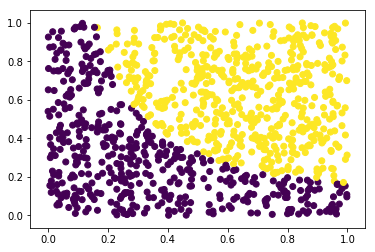

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=Y[:, 0])

## model

In [15]:
model_x = Input((2, ))
model_y = Dense(1, activation='sigmoid')(model_x)
model = Model(model_x, model_y)

In [16]:
model.compile(
    loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [17]:
hist = model.fit(X, Y, batch_size=50, epochs=500, verbose=0)
print(model.evaluate(X, Y, verbose=0))

[0.3667111792564392, 0.886]


## predict

In [18]:
pred = model.predict(X) > 0.5
Y_pred = np.where(pred, 1, 0)

In [19]:
cond1 = np.logical_and(Y == 1, Y != Y_pred).flatten()
cond0 = np.logical_and(Y == 0, Y != Y_pred).flatten()

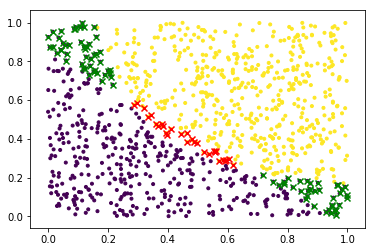

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=Y[:, 0], marker='.')
plt.scatter(X[cond1][:, 0], X[cond1][:, 1], c='r', marker='x')
plt.scatter(X[cond0][:, 0], X[cond0][:, 1], c='g', marker='x')

## contour

In [27]:
px, py = np.meshgrid(np.linspace(0, 1), np.linspace(0, 1))
pxy = np.vstack((px.flatten(), py.flatten())).T
pz = model.predict(pxy).reshape(50, 50)
# pz = np.where(pz > 0.5, 1, 0)

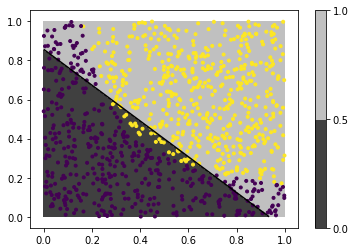

In [35]:
plt.contourf(px, py, pz, 1, cmap=plt.cm.binary_r)
# plt.pcolormesh(px, py, pz, cmap=plt.cm.binary_r)
plt.colorbar()
plt.contour(px, py, pz, [0.5], colors='k')
plt.scatter(X[:, 0], X[:, 1], c=Y[:, 0], marker='.')

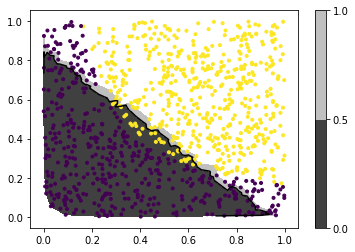

In [36]:
plt.tricontourf(X[:,0], X[:,1], Y_pred[:,0], 1, cmap=plt.cm.binary_r)
plt.colorbar()
plt.tricontour(X[:,0], X[:,1], Y_pred[:,0], [0.5], colors='k')
plt.scatter(X[:, 0], X[:, 1], c=Y[:, 0], marker='.')

# polynomial logistic regression

## data

In [3]:
X = np.random.rand(1000, 2)
Y = np.where((X[:, 0]-0.5)**2/9 + (X[:, 1]-0.5)**2/6 < 0.01 + np.random.randn(1000)/300, 1, 0)[:, np.newaxis]

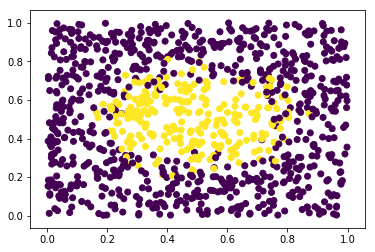

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=Y[:, 0])

## model

In [5]:
def to_polynomial(x, y, n):
    l = []
    for i in range(n+1):
        for j in range(i+1):
            if i==0:
                continue
            l.append(x**(i-j) * y**j)
    return l

In [6]:
model_x = Input((2, ))
model_y = Lambda(lambda x: K.map_fn(lambda y: K.stack(to_polynomial(y[0], y[1], 6)), x))(model_x)
model_y = Dense(1, activation='sigmoid')(model_y)
model = Model(model_x, model_y)

In [7]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [8]:
hist = model.fit(X, Y, batch_size=50, epochs=500, verbose=0)

## predict

In [9]:
pred = model.predict(X)
Y_pred = np.where(pred>0.5, 1, 0)

In [10]:
cond0 = np.logical_and(Y==0, Y!=Y_pred).flatten()
cond1 = np.logical_and(Y==1, Y!=Y_pred).flatten()

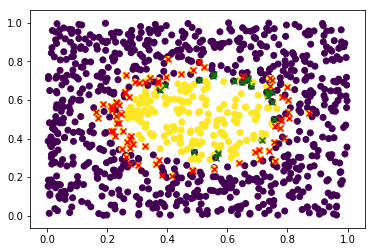

In [11]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0])
plt.scatter(X[cond0][:,0], X[cond0][:,1], c='g', marker='x')
plt.scatter(X[cond1][:,0], X[cond1][:,1], c='r', marker='x')

## contour

In [12]:
px, py = np.meshgrid(np.linspace(0, 1), np.linspace(0, 1))
pxy = np.vstack([px.flatten(), py.flatten()]).T
pz = model.predict(pxy).reshape(50, 50)

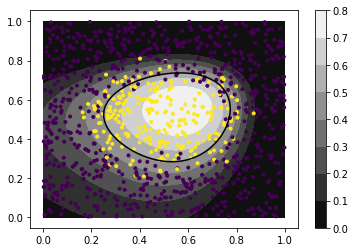

In [24]:
plt.contourf(px, py, pz, cmap=plt.cm.binary_r)
plt.colorbar()
plt.contour(px, py, pz, [0.5], colors='k')
plt.scatter(X[:,0], X[:,1], c=Y[:,0], marker='.')